<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis

_Authors: Kevin Markham (DC)_

---

In [90]:
# Load pandas into python
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Learning Objectives

By the end of the lesson, you will be able to...
- **Explain** what Pandas is and how it relates to data science
- **Manipulate** Pandas DataFrames and Series
- **Filter and sort** data using Pandas
- **Manipulate** DataFrame columns
- **Know** how to handle null and missing values

<a id="pandas"></a>

## What is Pandas

- **Objective:** **Define** what Pandas is and how it relates to data science

### Pandas Data Types

Pandas is a Python library that provides two datatypes: `DataFrame` and `Series`.

**Code-along**

In [4]:
# Pandas dataframe
my_df = pd.DataFrame({'a': [1, 1, 3, 4], 'b': ['x', 'y', 'y', 'z'], 'c': [5., 6., 5., 8.]})
my_df

,a,b,c
0,1,x,5.0
1,1,y,6.0
2,3,y,5.0
3,4,z,8.0


**Pandas DataFrame**

- Each row has a label (the `row index`)
- Each column has a label (the `column index`)

In [7]:
# Pandas series
my_df.columns
# my_df.rows()

Index(['a', 'b', 'c'], dtype='object')

**Pandas Series**

Essentially a single column from a DataFrame, or a numpy array with an `index`

**Note**

It is possible to have a one-column DataFrame, which does have a `column index`. Sometimes the difference matters, so pay attention to it, especially if you are getting surprising errors.

In [ ]:
one_column_df = my_df.loc[:, ['a']]
one_column_df

### Pandas and Numpy

Pandas is a "wrapper" around `numpy`, so it takes advantage of the optimizations that make `numpy` fast while adding attributes and methods that are useful for data science.

In [ ]:
# From pandas to numpy


### Vectorization

In [8]:
new_df = my_df.copy()

# don't do this!
for row_num, row in my_df.iterrows():
    new_df.loc[row_num, 'a'] = my_df.loc[row_num, 'a'] + 1

new_df

,a,b,c
0,2,x,5.0
1,2,y,6.0
2,4,y,5.0
3,5,z,8.0


For-loops are **slow** and **ugly**! Use vector and matrix math instead.

In [13]:
new_df = my_df.copy()

# do this instead


`numpy` and `pandas` automatically "broadcast" to match dimensions when possible

### DataFrame Methods and Attributes

- An **attribute** is a piece of information about a class instance. You use dot syntax to access it (e.g., my_df.shape).
- A **method** is a function that is defined for a specific class (e.g. Series, DataFrame). You use dot syntax to call it, with parentheses for passing in arguments.

In [18]:
# View row index
new_df.loc[:,:]

,a,b,c
0,1,x,5.0
1,1,y,6.0
2,3,y,5.0
3,4,z,8.0


In [ ]:
# View column index


In [49]:
# Select first n rows, 5 by default
new_df.head()

,a,b,c
0,1,x,5.0
1,1,y,6.0
2,3,y,5.0
3,4,z,8.0


In [50]:
# Select first 2 rows
new_df.head(2)

,a,b,c
0,1,x,5.0
1,1,y,6.0


In [ ]:
# Select last 2 rows


In [51]:
# See the types of the columns
new_df.tail(2)

,a,b,c
2,3,y,5.0
3,4,z,8.0


In [53]:
# Get the number of rows and columns
new_df.shape

(4, 3)

In [56]:
# Get a concise summary of DataFrame contents, including memory use
new_df.describe(include='all')

,a,b,c
count,4.00,4,4.000000
unique,NaN,3,NaN
top,NaN,y,NaN
freq,NaN,2,NaN
mean,2.25,NaN,6.000000
std,1.50,NaN,1.414214
min,1.00,NaN,5.000000
25%,1.00,NaN,5.000000
50%,2.00,NaN,5.500000
75%,3.25,NaN,6.500000


In [ ]:
# Get summary statistics for numeric columns


In [ ]:
# Get summary information for non-numeric columns


In [ ]:
# Get summary information for all columns


In [ ]:
# Get the means of the numeric columns


In [ ]:
# Get histograms of the numeric columns


### Selecting Rows and Columns

**Recommended Approach:** .loc and .iloc

In [21]:
# Select columns "a" and "b" using .loc, passing in both column names
new_df.loc[:,:"b"]

,a,b
0,1,x
1,1,y
2,3,y
3,4,z


In [46]:
# Select columns "a" and "b" using .loc, passing in a range of column names
new_df.loc['a' : 'b',:]

,a,b,c


In [ ]:
# Select columns "a" and "b" using .iloc


In [ ]:
# Select rows 1 and 2 using .loc


In [ ]:
# Select rows 1 and 2 using .iloc


In [29]:
# Select row 1 from columns "b" and "c" using .loc. What type is the result?
new_df.loc[1, ['b' 'c']]

KeyError: "None of [['bc']] are in the [index]"

In [36]:
# Select row 1 from columns "b" and "c" using .loc so that the result is a DataFrame
# thing = new_df.loc[1, ["b","c"]]
# print(thing)
thing = new_df.loc[[1], ['b', 'c']]
print(type(thing))

<class 'pandas.core.frame.DataFrame'>


In [38]:
# Select row 1 from columns "b" and "c" using .iloc
new_df.iloc[1, 1:]

b    y
c    6
Name: 1, dtype: object

**Alternative approaches** (not recommended, but you should be able to recognize them)

In [39]:
# Dictionary-style column selection
my_df['c']

0    5.0
1    6.0
2    5.0
3    8.0
Name: c, dtype: float64

In [40]:
# Selecting multiple columns
my_df[['b', 'c']]

,b,c
0,x,5.0
1,y,6.0
2,y,5.0
3,z,8.0


In [41]:
# Slicing into a series
my_df['c'][0]

5.0

In [42]:
# Dot syntax
my_df.c

0    5.0
1    6.0
2    5.0
3    8.0
Name: c, dtype: float64

In [43]:
# 
my_df.c[1]

6.0

### Viewing Documentation

In [ ]:
# Jupyter-specific


In [ ]:
# General


Reading documentation can feel like reading a foreign language at first. It will get better!

For functions and methods, focus on two things:

- What arguments does it take?
- What does it return?

<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

In [75]:
users = pd.read_table('./data/user.tbl', sep='|')

**Exercise (individual):** Examine the users data

In [76]:
# print the first 30 rows of `users`
users.head(30)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [77]:
# Print the last 20 rows of `users`
users.tail(20)

,user_id,age,gender,occupation,zip_code
923,924,29,M,other,11753
924,925,18,F,salesman,49036
925,926,49,M,entertainment,01701
926,927,23,M,programmer,55428
927,928,21,M,student,55408
928,929,44,M,scientist,53711
929,930,28,F,scientist,07310
930,931,60,M,educator,33556
931,932,58,M,educator,06437
932,933,28,M,student,48105


In [81]:
# Use the built-in Python function `type` to get the type of `users`
print(type(users))

<class 'pandas.core.frame.DataFrame'>


In [83]:
 # Get the row index
users.loc[:,:]

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [84]:
# Get the column names
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [85]:
# Get the data types of the columns
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [86]:
# Get the number of rows and columns
users.shape

(943, 5)

In [89]:
# Get all values as a numpy array
np_array = users
print(np_array)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
5          6   42      M      executive    98101
6          7   57      M  administrator    91344
7          8   36      M  administrator    05201
8          9   29      M        student    01002
9         10   53      M         lawyer    90703
10        11   39      F          other    30329
11        12   28      F          other    06405
12        13   47      M       educator    29206
13        14   45      M      scientist    55106
14        15   49      F       educator    97301
15        16   21      M  entertainment    10309
16        17   30      M     programmer    06355
17        18   35      F          other    37212
18        19   40      M      librarian    02138
19        20   42   

In [106]:
# Get concise summary of contents of `users`
np_array.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [94]:
# Get summary statistics for `users
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [101]:
# select the "gender" column using .loc
users.loc[:,"gender"]


0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

In [102]:
# select rows 10-20 (inclusive) of the "gender" column using .loc
users.loc[1:20,"gender"]

1     F
2     M
3     M
4     F
5     M
6     M
7     M
8     M
9     M
10    F
11    F
12    M
13    M
14    F
15    M
16    M
17    F
18    M
19    F
20    M
Name: gender, dtype: object

In [105]:
# select the "gender" column using .iloc
users.iloc[:,2]

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

In [107]:
# select rows 10-20 (inclusive) of the "gender" column using .iloc
users.iloc[10:20,2]

10    F
11    F
12    M
13    M
14    F
15    M
16    M
17    F
18    M
19    F
Name: gender, dtype: object

In [108]:
# Get the type of the object returned from the previous cell
print(type(users.iloc[10:20,2]))

<class 'pandas.core.series.Series'>


In [ ]:
# describe all `object` columns


In [ ]:
# describe all columns, including non-numeric


In [ ]:
# calculate the mean of the ages


In [ ]:
# draw a histogram of a column (the distribution of ages)


**Code-along:** Count the number of occurrences of each value

In [ ]:
# can also be used with numeric variables


In [ ]:
users.loc[:, 'age'].value_counts().sort_index().plot(kind='bar', figsize=(12,12));     # bigger plot by increasing age
plt.xlabel('Age');
plt.ylabel('Number of users');
plt.title('Number of users per age');

<a id="exercise-one"></a>
### Exercise

In [117]:
# read drinks.csv into a DataFrame called 'drinks'
drinks = pd.read_csv('./data/drinks.csv')

In [131]:
# print the head and the tail
drinks.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [130]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [119]:
# examine the default index, data types, and shape
drinks.index


RangeIndex(start=0, stop=193, step=1)

In [120]:
# print the 'beer_servings' Series
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [143]:
drinks.shape

(193, 6)

In [65]:
# calculate the average 'beer_servings' for the entire dataset
drinks['beer_servings'].mean()

106.16062176165804

In [128]:
# count the number of occurrences of each 'continent' value and see if it looks correct
drinks['continent'].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [145]:
# Does not look correct.  Where is NA, North America?
# drinks['continent' == 'NA']
drinks.describe()


KeyError: False

In [154]:
# drinks['continent' == 'NA']
drinks.loc[:,'continent'].isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

<a id="filtering-and-sorting"></a>
### Filtering and Sorting
- **Objective:** **Filter and sort** data using Pandas

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

**logical filtering: only show users with age < 20**

In [161]:
# create a Series of booleans...
# in Pandas, this comparison is performed element-wise on each row of data
# drinks['age < 20']
users.loc[:, 'age'] < 20

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
913    False
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924     True
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
Name: age, Length: 943, dtype: bool

In [183]:
# ...and use that Series to filter rows
young_bool = users.loc[:, 'age'] == True
users.loc[young_bool, 'occupation'].value_counts()

<bound method IndexOpsMixin.value_counts of Series([], Name: occupation, dtype: object)>

**Note**: You can also do `users[young_bool]`, but that approach gets confusing: it returns a *copy* rather than a *view*, so if you reassign values `users[young_bool]` then they won't be reflected in `users`. I prefer to use `.loc`, which returns a view, and explicitly call `.copy()` on the result when I want a copy.

In [189]:
# or, combine into a single step
boys = (users.loc[:, 'age'] < 20) & (users.loc[:, 'gender'] == 'M')
users.loc[boys, :]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755
220,221,19,M,student,20685
245,246,19,M,student,28734


In [196]:
# select "occupation" column from the filtered results
professionals = users.loc[:, 'occupation'].isin(['doctor', 'lawyer'])
users.loc[professionals, :]



,user_id,age,gender,occupation,zip_code
9,10,53,M,lawyer,90703
124,125,30,M,lawyer,22202
125,126,28,F,lawyer,20015
137,138,46,M,doctor,53211
160,161,50,M,lawyer,55104
204,205,47,M,lawyer,06371
250,251,28,M,doctor,85032
298,299,29,M,doctor,63108
338,339,35,M,lawyer,37901
364,365,29,M,lawyer,20009


In [ ]:
# value_counts of resulting Series


**Logical filtering with multiple conditions**

In [ ]:
# ampersand for AND condition. (this is a "bitwise" AND)
# important: you MUST put parentheses around each expression because '&' has a higher precedence than '<'!


In [ ]:
# pipe for OR condition. (this is a "bitwise" OR)
# important: you MUST put parentheses around each expression because '|' has a higher precedence than '<'!


In [ ]:
# preferred alternative to multiple OR conditions


**Sorting**

In [ ]:
# sort a Series


In [ ]:
# sort a DataFrame by a single column


In [ ]:
# use descending order instead


In [198]:
# sort by multiple columns
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


<a id="exercise-two"></a>
**Exercise:** Use `drinks` dataframe from earlier to complete the following.

In [202]:
# filter DataFrame to only include European countries
Europe = (drinks.loc[:, 'continent'] == 'EU')
drinks.loc[Europe, :]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [206]:
# filter DataFrame to only include European countries with wine_servings > 300
winos = (drinks.loc[:, 'wine_servings']) > 300
drinks.loc[winos, :]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [214]:
# calculate the average 'beer_servings' for all of Europe
beer_drinkers = (drinks.loc[:, 'continent'] == 'EU').value_counts().mean()
print(beer_drinkers)

96.5


In [220]:
# determine which 10 countries have the highest total_litres_of_pure_alcohol
drinks
# alcoholics = (drinks.loc[:, 'total_litres_of_pure_alcohol']).sort(descending, 10)
drinks.loc[:, 'country'].nlargest(10, 'total_litres_of_pure_alcohol')

ValueError: keep must be either "first", "last"

<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** **Manipulate** DataFrame columns

In [ ]:
# Are beer servings and spirit servings correlated?
drinks.plot(kind='scatter', x='beer_servings', y='spirit_servings')

print(drinks.corr().loc[:, 'beer_servings'])  # Correlation coefficients

In [ ]:
# renaming one or more columns in a single output using value mapping


In [227]:
# renaming one or more columns in the original DataFrame
df2 = drinks.rename(columns = {'beer_servings' : 'beer', 'wine_servings' : 'wine'}, inplace = True)
drinks


,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [ ]:
# replace all column names using a list of matching length


In [ ]:
# replace during file reading (disables the header from the file)


**Easy Column Operations**
Rather than having to reference indexes and creating for loops to do column wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each rows together.

In [ ]:
# add a new column as a function of existing columns


**Removing Columns**

In [ ]:
# axis=0 for rows, 1 for columns


In [226]:
# drop multiple columns


,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [ ]:
# drop on the original DataFrame rather than returning a new one


<a id="missing-values"></a>
### Handling Missing Values

- **Objective:** **Know** how to handle null and missing values

Pandas represents missing values as `None` or `np.NaN`.

It is important to distinguish between several classes of missing data and handle it accordingly:

- Data that was never collected
- Data that was handled incorrectly at some point (possibly by you!)
- A "null" value, e.g. "zero", "false", "not applicable", or "entered an empty string"

As noted in lesson 6, truly missing data can be handled in three ways:

- Delete the row
- Delete the column
- Impute the values based on other rows/columns

If missingness is correlated with the value of the variable in question (e.g. patients who have side effects from a trial drug tend not to come back after the first dose, so their results aren't recorded), then you are in trouble.

In [ ]:
# missing values are usually excluded in calculations by default


In [ ]:
# includes missing values


In [ ]:
# find missing values in a Series
# True if missing, False if not missing


In [ ]:
# count the missing values - sum() works because True is 1 and False is 0


In [ ]:
# True if not missing, False if missing


In [ ]:
# only show rows where continent is not missing


**Understanding Pandas Axis**

In [ ]:
# sums "down" the 0 axis (rows) -- so, we get the sums of each column


In [ ]:
# axis=0 is the default


In [ ]:
# sums "across" the 1 axis (columns) -- so, we get the sums of numeric values in the row (beer+spirit+wine+liters+...)


**Find missing values in a DataFrame**

In [ ]:
# Get DataFrame of booleans indicating locations of missing values in `drinks`


In [ ]:
# count the missing values in each column


**Dropping Missing Values**

In [ ]:
# drop a row if ANY values are missing from any column -- can be dangerous!


In [ ]:
# drop a row only if ALL values are missing


**Filling Missing Values**
If you noticed the continent North American, NA, does not appear in the `continent` column.  Pandas read in the original data and saw 'NA' and thought it was a missing value and converted it to a 'NaN', missing value.

In [ ]:
# fill in missing values with 'NA' -- this is dangerous to do without manually verifying them!


In [ ]:
# modifies 'drinks' in-place


In [ ]:
# turn off the missing value filter -- better approach!


<a id="exercise-three"></a>
**Exercise**

In [ ]:
# read ufo.csv into a DataFrame called 'ufo'


In [ ]:
# Inspect first 3 roads of `ufo`


In [ ]:
# check the shape of the DataFrame


In [ ]:
# what are the three most common colors reported?


In [ ]:
# Replace spaces with underscores in column names.
# Basic: Just type of a new list of column names and assign it to `ufo.columns`
# Bonus: Complete this task with a list comprehension that would work for any DataFrame.


In [ ]:
# for reports in VA, what's the most common city?


In [ ]:
# print a DataFrame containing only reports from Arlington, VA


In [ ]:
# count the number of missing values in each column


In [ ]:
# how many rows remain if you drop all rows with any missing values?


<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-Apply-Combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the mean() function to find the average beer consumption.
- **Combine:** We now combine the continent names with the mean()s to produce a summary of our findings.

In [ ]:
# for each continent, calculate the mean beer servings


In [ ]:
# for each continent, calculate the mean of all numeric columns


In [ ]:
# for each continent, describe beer servings


In [ ]:
# "agg" allows you to apply an arbitrary aggregation function to each column


In [ ]:
# for each continent, describe all numeric columns


In [ ]:
# for each continent, count the number of rows
# first use a groupby, then use .value_counts()


<a id="exercise-four"></a>
**Exercise**

Use the `users` dataframe to complete the following exercises.

In [ ]:
users.head(3)

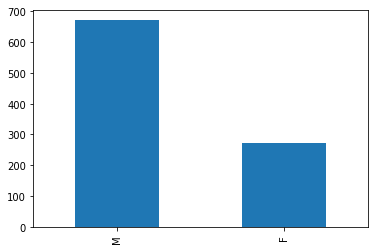

In [113]:
# for each occupation in 'users', count the number of occurrences
users.loc[:, 'gender'].value_counts()
users.loc[:, 'gender'].value_counts().plot(kind='bar')

In [116]:
# for each occupation, calculate the mean age
users.loc[:, 'occupation'].mean('age')


ValueError: No axis named age for object type <class 'pandas.core.series.Series'>

In [ ]:
# for each occupation, calculate the minimum and maximum ages


In [ ]:
# for each combination of occupation and gender, calculate the mean age


----

<a id="joining-dataframes"></a>
### Joining (Merging) DataFrames

"Tidy data" is data that is organized as follows:

- One variable per column
- One observation per row
- One type of observational unit per table

In [ ]:
# Load movie titles
movie_cols = ['movie_id', 'title']
movies_path = './data/movies.tbl'
movies = pd.read_table(movies_path, sep='|', header=None, names=movie_cols, usecols=[0, 1], encoding='latin-1')
movies.head()

In [ ]:
# Load movie ratings
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_path = './data/movie_ratings.tsv'
ratings = pd.read_table(ratings_path, sep='\t', header=None, names=rating_cols)
ratings.head()

Now if we want to know the title associated with a particular rating, we match up the rows of the two tables by `movie_id`.

SQL calls this "matching up" operation a **join**. Pandas calls it **merge**.

In [ ]:
# merge 'movies' and 'ratings' (inner join on 'movie_id')
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

In [ ]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

This "normalized" format is conceptually nice, and it saves space.

Storing data in a "denormalized" format (e.g. by storing move titles in the table with ratings) is sometimes justified to avoid expensive join operations, especially in web programming.

<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [ ]:
# apply an arbitrary function to each value of a Pandas column, storing the result in a new column
users.loc[:, 'under30'] = users.loc[:, 'age'].apply(lambda age: age < 30)

In [ ]:
# apply an arbitrary function to each row of a DataFrame, storing the result in a new column
#  (remember that by default axis=0. Since we want to go row-by-row, we set axis=1)
users.loc[:, 'under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)

In [ ]:
# map existing values to a different set of values
users['is_male'] = users.loc[:, 'gender'].map({'F':0, 'M':1})

In [ ]:
# replace all instances of a value in a column (must match entire value)
ufo.loc[:, 'State'].replace('Fl', 'FL', inplace=True)

In [ ]:
# string methods are accessed via 'str'
ufo.loc[:, 'State'].str.upper()                               # converts to uppercase

In [ ]:
# checks for a substring
ufo.loc[:, 'Colors_Reported'].str.contains('RED', na='False') 

In [ ]:
# convert a string to the datetime format (this is often slow -- consider doing it in the read_csv() method)
ufo.loc[:, 'Time'] = pd.to_datetime(ufo.loc[:, 'Time'])
ufo.loc[:, 'Time'].dt.hour                        # datetime format exposes convenient attributes

In [ ]:
(ufo.Time.max() - ufo.Time.min()).days  # also allows you to do datetime "math"

In [ ]:
# setting and then removing an index
ufo.set_index('Time', inplace=True)
ufo

In [ ]:
ufo.reset_index(inplace=True)
ufo

In [ ]:
# change the data type of a column
drinks.loc[:, 'beer'] = drinks.loc[:, 'beer'].astype('float')

In [ ]:
# create dummy variables for 'continent' and exclude first dummy column
continent_dummies = pd.get_dummies(drinks.loc[:, 'continent'], prefix='cont').iloc[:, 1:]
continent_dummies

In [ ]:
# concatenate two DataFrames (axis=0 for rows, axis=1 for columns)
drinks = pd.concat([drinks, continent_dummies], axis=1)
drinks

<a id="uncommon-features"></a>
### OPTIONAL: Other Less Used Features of Pandas

In [ ]:
# detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # count of duplicates
users[users.duplicated()]   # only show duplicates
users.drop_duplicates()     # drop duplicate rows
users.age.duplicated()      # check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # specify columns for finding duplicates

In [ ]:
# convert a range of values into descriptive groups
drinks['beer_level'] = 'low'    # initially set all values to 'low'
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # change 101-200 to 'med'
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # change 201-400 to 'high'

In [ ]:
# display a cross-tabulation of two Series
pd.crosstab(drinks.loc[:, 'continent'], drinks.beer_level)

In [ ]:
# convert 'beer_level' into the 'category' data type
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # sorts by the categorical ordering (low to high)

In [ ]:
# limit which rows are read when reading in a file -- useful for large files!
pd.read_csv('./data/drinks.csv', nrows=10)           # only read first 10 rows
pd.read_csv('./data/drinks.csv', skiprows=[1, 2])    # skip the first two rows of data

In [ ]:
# write a DataFrame out to a CSV
drinks.to_csv('drinks_updated.csv')                 # index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # ignore index

In [ ]:
# create a DataFrame from a dictionary
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# create a DataFrame from a list of lists
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

In [ ]:
# randomly sample a DataFrame
import numpy as np
mask = np.random.rand(len(drinks)) < 0.66   # create a Series of booleans
train = drinks[mask]                        # will contain around 66% of the rows
test = drinks[~mask]                        # will contain the remaining rows

In [ ]:
# change the maximum number of rows and columns printed ('None' means unlimited)
pd.set_option('max_rows', None)     # default is 60 rows
pd.set_option('max_columns', None)  # default is 20 columns
print(drinks)

In [ ]:
# reset options to defaults
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# change the options temporarily (settings are restored when you exit the 'with' block)
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

In this notebook, the most important things to familiarize yourself with are the basics:

- Manipulating DataFrames and Series
- Filtering Columns and Rows
- Handling Missing Values
- Split-Apply-Combine (this one takes some practice!)

You will pick up more over time. Google, Stack Overflow, and the Pandas documentation are your friends!

# Questions?

# Exit Tickets

https://docs.google.com/forms/d/e/1FAIpQLSfvZxGW3CHmZzIhNqz-5uzMeDTQHHDOH8G2ovTPbT5U6Q8KLA/viewform?usp=send_form